In [1]:
import pytplot
from scipy.io import readsav
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

Qt graphics import failed with error module 'pyqtgraph' has no attribute 'ptime'
Turning off qt graphics.  Bokeh plotting is still enabled.


In [5]:
data = readsav('F2.tplot')

In [6]:
data.keys()


dict_keys(['dq', 'tv'])

In [7]:
data['dq'][0][1]['x'][0]

array([1.577736e+08, 1.577742e+08, 1.577748e+08, ..., 1.893636e+08,
       1.893642e+08, 3.786912e+09])

In [2]:
def tplotToDF(filename):
    data = readsav(filename)
    time = data['dq'][0][1]['x'][0]#all the times are equal for each piece of data
    time = time.byteswap().newbyteorder()
    n_times = len(time)
    energy = data['dq'][0][1]['v'][0]#all datasets with energies are also all equal
    energy = energy.byteswap().newbyteorder()
    energies = np.tile(energy,(n_times,1))
    column_names= ['Times','Energies']
    fluxOrPos = []
    for i in range(0,len(data['dq'])):
        column_name = data['dq'][i][0]
        if isinstance(column_name, bytes):
            column_name = column_name.decode('utf-8')
        column_names.append(column_name)
        fluxOrPos.append(data['dq'][i][1]['y'][0].T)
    df = pd.DataFrame(columns=column_names)
    df['Times'] = time
    df['Energies'] = list(energies)
    for i,fluxOrPos in enumerate(fluxOrPos):
        df[column_names[i+2]]=list(fluxOrPos)
    df['Datetime'] = pd.to_datetime(df['Times'], unit='s', origin='unix')
    df.set_index('Datetime',inplace=True)
    return df

In [7]:
def plotBurstReceiver(df,col = 'T_MODE_1',start_date = '1973-07-12 21:00:00',end_date='1974-12-31 22:10:00',save = False,filname = '',title = ''):
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    df_select = df[(df.index > start)&(df.index < end)]
    
    times = df_select.index

    energies = np.unique(np.hstack(df_select['Energies']))  # Flatten and get unique energy values
    flux = np.array(df_select[col].tolist())  # Convert flux values to a 2D array

    # Create 2D meshgrid for times and energies
    time_grid, energy_grid = np.meshgrid(times, energies)

    # Plot with pcolormesh
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(time_grid, energy_grid, flux.T, shading='auto', cmap='viridis')  # Transpose if necessary

    # Add labels and title
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.title(title)
    plt.colorbar(label="Flux Intensity")
    if(save ==True):
        plt.savefig(filename)
    # Show the plot
    plt.show()

In [4]:
df = tplotToDF('F1.tplot')

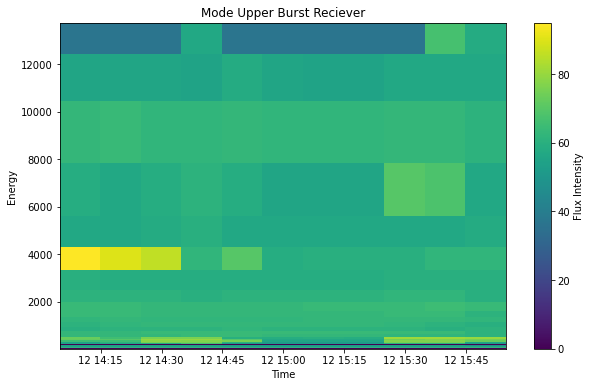

In [8]:
plotBurstReceiver(df,start_date = "1973-12-12 14:00",end_date = "1973-12-12 16:00", col ='T_MODE_1', title='Mode Upper Burst Reciever')

In [10]:
df.to_csv('F1.csv')

In [11]:
df.head(len(df))

,Times,Energies,T_MIN_1,T_SUM_1,T_SUM_2,T_MIN_2,T_MAX_1,T_MAX_2,T_MODE_1,T_MODE_2,T_SUMSQ_1,T_SUMSQ_2,RAE_pos_GSE,RAE_pos_GEI,Earth_pos_GEI,Earth_unit_GSE
Datetime,,,,,,,,,,,,,,,,
1973-07-12 21:00:00,111358800.0,"[25, 35, 44, 55, 67, 83, 96, 110, 130, 155, 18...","[40, 41, 42, 0, 44, 44, 44, 44, 44, 44, 44, 0,...","[436, 447, 454, 0, 471, 471, 473, 473, 473, 47...","[436, 447, 454, 469, 471, 471, 473, 318, 340, ...","[40, 41, 42, 43, 44, 44, 44, 28, 31, 33, 29, 3...","[40, 41, 42, 0, 44, 44, 44, 44, 44, 44, 44, 0,...","[40, 41, 42, 43, 44, 44, 44, 28, 31, 33, 29, 3...","[40, 41, 42, 0, 44, 44, 44, 44, 44, 44, 44, 0,...","[40, 41, 42, 43, 44, 44, 44, 28, 31, 33, 29, 3...","[842, 864, 878, 0, 912, 912, 916, 916, 916, 91...","[842, 864, 878, 908, 912, 912, 916, 607, 651, ...","[205.49605, 92.74565, -322.7036]","[-158.3893, 275.58405, -232.2375]","[2.5700915, 7.1817293, 3.667538]","[6.6528964, -5.2071705, 0.5077299]"
1973-07-12 21:10:00,111359400.0,"[25, 35, 44, 55, 67, 83, 96, 110, 130, 155, 18...","[70, 70, 68, 0, 63, 60, 63, 61, 53, 53, 53, 0,...","[889, 889, 869, 0, 815, 822, 842, 819, 759, 74...","[899, 885, 841, 822, 781, 755, 754, 763, 734, ...","[40, 41, 42, 43, 44, 44, 44, 28, 31, 33, 29, 3...","[78, 82, 78, 0, 71, 74, 75, 74, 69, 64, 65, 0,...","[77, 79, 75, 73, 68, 68, 64, 74, 71, 60, 62, 6...","[72, 71, 69, 0, 63, 61, 64, 63, 54, 59, 58, 0,...","[40, 73, 42, 43, 44, 44, 44, 28, 31, 33, 29, 3...","[1627, 1657, 1598, 0, 1492, 1523, 1552, 1508, ...","[1660, 1639, 1554, 1511, 1431, 1395, 1374, 148...","[210.39787, 138.83205, -304.48376]","[-203.32323, 257.83444, -220.07507]","[2.5646627, 7.1835685, 3.667405]","[6.6557145, -5.2034173, 0.5068762]"
1973-07-12 21:20:00,111360000.0,"[25, 35, 44, 55, 67, 83, 96, 110, 130, 155, 18...","[69, 68, 67, 0, 62, 58, 62, 61, 52, 53, 55, 0,...","[898, 886, 872, 0, 814, 779, 816, 802, 715, 74...","[935, 916, 875, 861, 807, 768, 764, 738, 707, ...","[74, 71, 68, 66, 61, 58, 57, 54, 51, 50, 53, 5...","[72, 73, 71, 0, 63, 60, 64, 62, 54, 60, 67, 0,...","[77, 74, 70, 69, 63, 59, 59, 56, 53, 57, 62, 7...","[71, 69, 68, 0, 63, 59, 63, 61, 52, 54, 59, 0,...","[74, 73, 69, 67, 62, 58, 58, 55, 52, 51, 54, 5...","[1632, 1593, 1564, 0, 1447, 1376, 1450, 1421, ...","[1689, 1651, 1568, 1541, 1432, 1354, 1347, 129...","[213.4088, 162.18784, -291.47153]","[-226.28532, 247.7736, -210.25475]","[2.5616221, 7.1845922, 3.667329]","[6.6570225, -5.201652, 0.50639933]"
1973-07-12 21:30:00,111360600.0,"[25, 35, 44, 55, 67, 83, 96, 110, 130, 155, 18...","[71, 69, 68, 0, 62, 59, 62, 61, 52, 54, 58, 0,...","[942, 958, 930, 0, 899, 872, 866, 868, 820, 84...","[959, 953, 907, 896, 867, 835, 840, 808, 786, ...","[75, 72, 68, 67, 61, 58, 57, 55, 51, 51, 53, 5...","[82, 80, 80, 0, 77, 76, 73, 73, 69, 71, 75, 0,...","[81, 79, 76, 74, 72, 73, 74, 65, 65, 64, 70, 7...","[72, 70, 69, 0, 63, 60, 63, 61, 54, 61, 60, 0,...","[75, 74, 69, 68, 63, 58, 58, 55, 52, 55, 61, 6...","[1724, 1839, 1712, 0, 1650, 1600, 1572, 1602, ...","[1737, 1771, 1641, 1618, 1595, 1528, 1564, 150...","[216.1973, 206.81409, -260.716]","[-269.1105, 223.66852, -187.1847]","[2.5559742, 7.1864824, 3.6671855]","[6.659959, -5.19771, 0.5055157]"
1973-07-12 21:40:00,111361200.0,"[25, 35, 44, 55, 67, 83, 96, 110, 130, 155, 18...","[71, 70, 67, 0, 62, 58, 62, 61, 52, 53, 54, 0,...","[913, 904, 883, 0, 829, 796, 838, 850, 756, 75...","[965, 953, 909, 894, 876, 836, 819, 813, 768, ...","[75, 73, 68, 65, 61, 57, 57, 54, 52, 51, 54, 5...","[74, 75, 73, 0, 66, 64, 71, 74, 61, 61, 63, 0,...","[79, 79, 74, 72, 77, 68, 68, 72, 61, 59, 65, 7...","[72, 71, 68, 0, 62, 59, 63, 61, 54, 55, 58, 0,...","[76, 74, 69, 67, 61, 58, 57, 55, 53, 52, 58, 5...","[1651, 1639, 1622, 0, 1518, 1444, 1529, 1579, ...","[1790, 1780, 1710, 1698, 1683, 1595, 1524, 151...","[217.17105, 261.11557, -222.65668]","[-320.37155, 191.99863, -159.43398]","[2.5503254, 7.188358, 3.6670387]","[6.662882, -5.1937623, 0.50463486]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974-12-31

In [128]:
start_date = pd.to_datetime("1973-12-12 14:00")
end_date = pd.to_datetime("1973-12-12 16:00")
df_select = df[(df['Datetime'] > start_date)&(df['Datetime'] < end_date)]

In [127]:
df['Datetime'] = pd.to_datetime(df['Times'], unit='s', origin='unix')

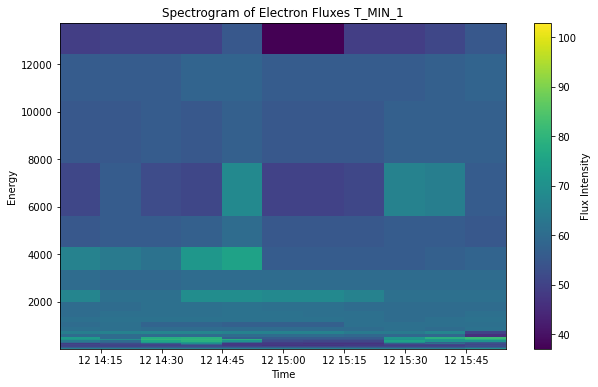

In [141]:
times = df_select['Datetime']

energies = np.unique(np.hstack(df_select['Energies']))  # Flatten and get unique energy values
flux = np.array(df_select["T_MODE_2"].tolist())  # Convert flux values to a 2D array

# Create 2D meshgrid for times and energies
time_grid, energy_grid = np.meshgrid(times, energies)

# Plot with pcolormesh
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_grid, energy_grid, flux.T, shading='auto', cmap='viridis')  # Transpose if necessary

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Spectrogram of Electron Fluxes T_MIN_1")
plt.colorbar(label="Flux Intensity")

# Show the plot
plt.show()

In [4]:




# Convert to DataFrame
df = pd.DataFrame.from_records(data['dq'])

print(df)

                 NAME                                                 DH  \
0          b'T_MIN_1'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
1          b'T_SUM_1'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
2          b'T_SUM_2'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
3          b'T_MIN_2'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
4          b'T_MAX_1'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
5          b'T_MAX_2'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
6         b'T_MODE_1'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
7         b'T_MODE_2'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
8        b'T_SUMSQ_1'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
9        b'T_SUMSQ_2'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
10     b'RAE_pos_GSE'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
11     b'RAE_pos_GEI'  [[[111358800.0, 111359400.0, 111360000.0, 1113...   
12   b'Earth

In [5]:
plt.plot(data['dq'][0][1]['y'][0])

 ...]

Error in callback <function flush_figures at 0x000002B0EE7000D0> (for post_execute):


KeyboardInterrupt: 

In [36]:
data['dq'][2][0]

b'T_SUM_2'

In [8]:
df.head()

,OPTIONS,SETTINGS
0,"[[[127526400.0, 127612800.0], [127526400.0, 12...","[[[127526400.0, 127886400.0], [('', 0, 0, 0, 0..."


In [8]:
pytplot.store_data('my_variable', data={'x': data["tv"], 'y': data["dq"]})

# Plot data
pytplot.tplot('my_variable')

The lengths of x and y do not match!
Qt was not successfully imported.  Specify save_file to save the file as a .html file.
